In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import nltk
from nltk.corpus import PlaintextCorpusReader
community_root = "data/community"
le_monde_root = "data/le_monde"
community_files = "community.*"
le_monde_files = "le_monde.*"
shakeshack_root = "data/shakeshack"
shakeshack_files = "shakeshack.*"
fiveguys_root = "data/fiveguys"
fiveguys_files = "fiveguys.*"
community_data = PlaintextCorpusReader(community_root,community_files)
le_monde_data = PlaintextCorpusReader(le_monde_root,le_monde_files)
shakeshack_data = PlaintextCorpusReader(shakeshack_root,shakeshack_files)
fiveguys_data = PlaintextCorpusReader(fiveguys_root,fiveguys_files)
restaurant_data = [('community',community_data.raw()),('le monde',le_monde_data.raw())
                  ,('shakeshack',shakeshack_data.raw()), ('fiveguys',fiveguys_data.raw())]

In [3]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [5]:
import nltk
from nltk.corpus import PlaintextCorpusReader
from nltk import sent_tokenize,word_tokenize 
from nltk.book import *
import gensim.summarization

In [7]:
import nltk
from nltk.corpus import PlaintextCorpusReader
community_root = "data/community"
le_monde_root = "data/le_monde"
community_files = "community.*"
le_monde_files = "le_monde.*"
shakeshack_root = "data/shakeshack"
shakeshack_files = "shakeshack.*"
fiveguys_root = "data/fiveguys"
fiveguys_files = "fiveguys.*"
community_data = PlaintextCorpusReader(community_root,community_files)
le_monde_data = PlaintextCorpusReader(le_monde_root,le_monde_files)
shakeshack_data = PlaintextCorpusReader(shakeshack_root,shakeshack_files)
fiveguys_data = PlaintextCorpusReader(fiveguys_root,fiveguys_files)

In [8]:
type(community_data)

nltk.corpus.reader.plaintext.PlaintextCorpusReader

In [9]:
text = community_data.raw()
summary_sentences = []

striptext = text.replace('\n\n', ' ')
striptext = striptext.replace('\n', ' ')

In [10]:
summary = gensim.summarization.summarize(striptext, word_count=100) 
print(summary)

We each ordered blueberry pancakes and a cup of coffee--no fresh fruit, no juice, no bacon.
I started with a raspberry iced tea & ordered the community custom egg white omelette with sautéed spinach & mushrooms and a side of smoked salmon.
I've come here several times with a friend for brunch and once for dinner -- we've both really enjoyed a lot of the breakfast foods available; my favorite is the brioche French toast with blackberry and lemon curd & she loves heir waffles.
This place is really good for breakfast and has great pancakes, sausages, eggs.


In [11]:
text = inaugural.raw('2017-Trump.txt')
summary_sentences = []
candidate_sentences = {}
candidate_sentence_counts = {}
striptext = text.replace('\n\n', ' ')
striptext = striptext.replace('\n', ' ')
summary = gensim.summarization.summarize(striptext, word_count=100) 
print(summary)
#print(gensim.summarization.keywords(striptext,words=10))

Chief Justice Roberts, President Carter, President Clinton, President Bush, President Obama, fellow Americans, and people of the world, thank you.
We the citizens of America are now joined in a great national effort to rebuild our country and restore its promise for all of our people.
Americans want great schools for their children, safe neighborhoods for their families, and good jobs for themselves.
At the bedrock of our politics will be a total allegiance to the United States of America, and through our loyalty to our country, we will rediscover our loyalty to each other.
In America, we understand that a nation is only living as long as it is striving.


In [12]:
import requests
from bs4 import BeautifulSoup
url="https://www.slate.com"
page = requests.get(url)
bs_page = BeautifulSoup(page.content,'lxml')
all_links = bs_page.find_all('a')
categories = ['news_and_politics','news-and-politics']
followable_links = list()
for link in all_links:
    href = link.get('href')
    if href:
        for cat in categories:
            if cat in href:
                followable_links.append(href)
print(len(followable_links))

36


In [13]:
followable_links

['https://slate.com/news-and-politics/2019/01/trump-says-he-may-declare-a-national-emergency-in-next-few-days-over-wall.html',
 'https://slate.com/news-and-politics/2019/01/paul-whelan-russia-espionage.html',
 '/news-and-politics',
 'https://slate.com/news-and-politics/2019/01/trump-says-he-may-declare-a-national-emergency-in-next-few-days-over-wall.html',
 'https://slate.com/news-and-politics/2019/01/paul-whelan-russia-espionage.html',
 '/news-and-politics',
 'https://slate.com/news-and-politics/2019/01/end-government-shutdown-trump-wall-deal.html',
 'https://slate.com/news-and-politics/2019/01/government-shutdown-border-wall-republicans-congress-trump.html',
 'https://slate.com/news-and-politics/2019/01/what-next-slate-daily-news-podcast-introduction.html',
 'https://slate.com/news-and-politics/2019/01/sotomayor-gorsuch-supreme-court-dissent-criminal-restitution.html',
 'https://slate.com/news-and-politics/2019/01/cyntoia-brown-clemency-tennessee-haslam.html',
 'https://slate.com/new

In [14]:
story_list = list()
count=0
for link in followable_links:
    try:
        page=BeautifulSoup(requests.get(link).content,'lxml')
        text=page.find('body').find('section',class_='article__body').get_text().strip()
        story_list.append(text)
        count+=1
    except:
        continue
print(count)       
        

26


In [15]:
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.parsing.preprocessing import STOPWORDS
import pprint

In [17]:
for i in range(len(story_list)):
    story = story_list[i]
    sents = sent_tokenize(story)
    for j in range(len(sents)):
        sent = sents[j]
        sent = sent.strip().replace('\n','')
        sents[j] = sent
    story_list[i] = '. '.join(sents)
story_list[0]

'President Donald Trump speaks to the media before departing the White House for Camp David on January 6, 2019 in Washington, D.C.Pool/Getty Images                Popular in                                  News & Politics                                    Looks Like Trump Lied When He Said Former Presidents Supported Wall                                      Democrats Won’t Give Trump a Wall.. But They Could End the Shutdown by Giving Him This.. Trump’s Wall Reportedly a Gimmick Campaign Aides Came Up With So He’d Remember to Talk Immigration                                      The Story of the American Arrested for Espionage in Russia Keeps Getting Stranger                            President Donald Trump made clear Sunday that he is still considering the possibility of declaring a national emergency in order to obtain the funds to build a wall along the border with Mexico.. “I may declare a national emergency dependent on what’s going to happen over the next few days,” Trump told

In [18]:

texts = [[word for word in story.lower().split()
        if word not in STOPWORDS and word.isalnum() and not word.lower() == 'slate']
        for story in story_list]



In [20]:
dictionary = corpora.Dictionary(texts) #(word_id,frequency) pairs
corpus = [dictionary.doc2bow(text) for text in texts] #(word_id,freq) pairs by sentence
#print(dictionary.token2id)
#print(dictionary.keys())
#print(corpus[3])
#print(texts[3])
#print(dictionary[37])
#dictionary[4]


In [21]:
print(texts[3])

['woman', 'umbrella', 'walks', 'red', 'square', 'past', 'kremlin', 'night', 'heavy', 'snowfall', 'moscow', 'yuri', 'images', 'popular', 'news', 'politics', 'wall', 'reportedly', 'gimmick', 'campaign', 'aides', 'came', 'remember', 'talk', 'immigration', 'looks', 'like', 'trump', 'lied', 'said', 'presidents', 'supported', 'wall', 'democrats', 'trump', 'end', 'shutdown', 'giving', 'trump', 'says', 'declare', 'national', 'wall', 'far', 'clear', 'paul', 'citizen', 'arrested', 'russia', 'week', 'charged', 'actually', 'definitely', 'fishy', 'background', 'marine', 'current', 'head', 'security', 'auto', 'parts', 'traveled', 'russia', 'multiple', 'times', 'current', 'employers', 'traveling', 'according', 'attending', 'wedding', 'apparently', 'russian', 'culture', 'studied', 'language', 'liked', 'traveling', 'country', 'unusually', 'account', 'russian', 'version', 'contacts', 'site', 'new', 'york', 'times', 'describes', 'sort', 'connection', 'academies', 'run', 'russian', 'defense', 'ministry', 

In [22]:
#Set parameters
num_topics = 3 #The number of topics that should be generated
passes = 10

In [23]:
lda = LdaModel(corpus,
              id2word=dictionary,
              num_topics=num_topics,
              passes=passes)

In [24]:
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(lda.print_topics(num_words=8))

[   (   0,
        '0.021*"trump" + 0.011*"president" + 0.011*"wall" + 0.009*"national" + '
        '0.008*"said" + 0.007*"news" + 0.007*"court" + 0.006*"government"'),
    (   1,
        '0.015*"trump" + 0.011*"wall" + 0.008*"like" + 0.006*"government" + '
        '0.006*"shutdown" + 0.006*"news" + 0.005*"president" + 0.005*"senate"'),
    (   2,
        '0.015*"trump" + 0.015*"government" + 0.014*"president" + '
        '0.013*"mcconnell" + 0.013*"democrats" + 0.012*"said" + '
        '0.012*"republicans" + 0.012*"senate"')]


In [26]:
from operator import itemgetter
lda.get_document_topics(corpus[0],minimum_probability=0.05,per_word_topics=False)
sorted(lda.get_document_topics(corpus[1],minimum_probability=0,per_word_topics=False),key=itemgetter(1),reverse=True)


[(1, 0.99708635), (0, 0.001476366), (2, 0.0014373073)]

In [27]:
newdoc = """
President Trump broke with his own intelligence agencies on Friday, appearing to accept Saudi Arabia’s explanation that the journalist Jamal Khashoggi was killed by accident during a fistfight, while the United States’ spy agencies are increasingly convinced that he was assassinated on high-level orders from the Saudi royal court.

Mr. Trump, who has cultivated Crown Prince Mohammed bin Salman and made Saudi Arabia the linchpin of his Middle East strategy, has been deeply reluctant to point a finger at the prince, despite evidence linking him to Saudi operatives who entered the country’s consulate in Istanbul the same day that Mr. Khashoggi disappeared there.

Asked during a visit to an Air Force base in Arizona whether he viewed the Saudi explanation as credible, Mr. Trump said, “I do.”

[Jamal Khashoggi is dead. Here is everything we know so far.]

The president said he still had questions for Prince Mohammed, and he called the killing of Mr. Khashoggi “unacceptable.” Mr. Trump also raised the possibility of sanctions against Saudi Arabia, but said that he hoped that Congress would not try to block billions of dollars in weapons sales to the kingdom, which he has held up as proof of the fruits of the alliance.

Mr. Trump’s response sets up a clash with Congress, where Republicans and Democrats both tarred the Saudi explanation as lacking credibility. A senior lawmaker briefed on American intelligence assessments of the circumstances surrounding Mr. Khashoggi’s death, and the likely culprits, said it was not consistent with the Saudi account.

The lawmaker, Representative Adam B. Schiff of California, the senior Democrat on the House Intelligence Committee, said, “The kingdom and all involved in this brutal murder must be held accountable, and if the Trump administration will not take the lead, Congress must.”

Senator Lindsey Graham, Republican of South Carolina and a close ally of Mr. Trump’s, declared in a Twitter post, “To say that I am skeptical of the new Saudi narrative about Mr. Khashoggi is an understatement.” He added, “It’s hard to find this latest ‘explanation’ as credible.”

The growing evidence that Mr. Khashoggi, a Virginia resident and a columnist for The Washington Post, was killed on orders from the Saudi royal family has put Mr. Trump in an increasingly untenable position.

On Friday evening, the president praised the statement issued by the Saudi government, which confirmed Mr. Khashoggi’s death, as a “good first step” and a “big step.” Earlier, the prince and other senior Saudi officials had denied any role in Mr. Khashoggi’s disappearance.

Editors’ Picks

11 Takeaways From The Times’s Investigation Into Trump’s Wealth

50 Years Later, It Feels Familiar: How America Fractured in 1968

How to Buy a Gun in 15 Countries
Secretary of State Mike Pompeo spoke with Prince Mohammed by phone on Friday evening and then briefed Mr. Trump and his national security adviser, John R. Bolton, according to a White House spokesman.

“I think we’re getting close to solving a big problem,” Mr. Trump told reporters at the Luke Air Force Base, where he was shown an Apache helicopter, an F-35 fighter jet and an array of bombs.

Image
Representative Adam B. Schiff of California, the top Democrat on the House Intelligence Committee, in May on Capitol Hill. He was among the lawmakers who tarred the explanation by Saudi Arabia as lacking credibility.CreditTom Brenner/The New York Times
For the president, Saudi Arabia has become a key ally but also a troublesome partner. Saudi support is critical to his efforts to isolate Iran. But he has watched as Prince Mohammed pursued a deadly war in Yemen, carried on a feud with his neighbor Qatar, jailed female dissidents and detained hundreds of wealthy Saudis.

Mr. Trump’s son-in-law and senior adviser, Jared Kushner, cultivated a relationship with the prince, who is close to him in age and who Mr. Kushner hoped would be an advocate for his peace proposal between Israel and the Palestinians.

In internal discussions, Mr. Kushner has urged the president and his aides not to abandon Prince Mohammed. But as Turkish officials leaked details of the grisly killing of Mr. Khashoggi and of the dismemberment of his body, the White House has become increasingly isolated in its defense of Saudi Arabia.

A stream of prominent Wall Street and tech executives canceled plans to attend an investor conference convened by the prince next week in Riyadh, the Saudi capital. On Thursday, Steven Mnuchin, the Treasury secretary, pulled out of the conference, as well, though he will attend a separate meeting on counterterrorism strategy.

In an interview on Thursday with The New York Times, Mr. Trump acknowledged that the furor over Mr. Khashoggi’s death had mushroomed into one of the biggest foreign policy crises of his presidency.

“This one has caught the imagination of the world, unfortunately,” Mr. Trump said. “It’s not a positive. Not a positive.”

The president also said on Thursday that it was still “a little bit early” in the process to draw definitive conclusions about who ordered the killing. But he expressed no doubt that the truth would come out soon.

“We’re working with the intelligence from numerous countries,” he said, adding, “This is the best intelligence we could have.”

On Wednesday, The Times reported that American intelligence officials were increasingly convinced that Prince Mohammed is culpable in Mr. Khashoggi’s death, and that they were preparing an appraisal for the White House.

Saudi Arabia tried to project the idea of a housecleaning, announcing that Saud al-Qahtani, a close aide to the crown prince; Maj. Gen. Ahmed al-Assiri, the deputy director of Saudi intelligence; and other high-ranking intelligence officials had been dismissed.

For Mr. Trump, who is on a three-day swing in the West before the midterm elections, the Khashoggi affair has become a distraction during a period in which he had hoped to campaign for Republican congressional candidates on a message of economic growth and the recent confirmation of Justice Brett M. Kavanaugh to the Supreme Court.

Just after answering questions about the Saudi announcement, Mr. Trump flew to a “Make America Great Again” rally in Mesa, Ariz.


"""

In [28]:
newdoc

'\nPresident Trump broke with his own intelligence agencies on Friday, appearing to accept Saudi Arabia’s explanation that the journalist Jamal Khashoggi was killed by accident during a fistfight, while the United States’ spy agencies are increasingly convinced that he was assassinated on high-level orders from the Saudi royal court.\n\nMr. Trump, who has cultivated Crown Prince Mohammed bin Salman and made Saudi Arabia the linchpin of his Middle East strategy, has been deeply reluctant to point a finger at the prince, despite evidence linking him to Saudi operatives who entered the country’s consulate in Istanbul the same day that Mr. Khashoggi disappeared there.\n\nAsked during a visit to an Air Force base in Arizona whether he viewed the Saudi explanation as credible, Mr. Trump said, “I do.”\n\n[Jamal Khashoggi is dead. Here is everything we know so far.]\n\nThe president said he still had questions for Prince Mohammed, and he called the killing of Mr. Khashoggi “unacceptable.” Mr. 

In [29]:
text = newdoc
striptext = text.replace('\n\n', ' ')
striptext = striptext.replace('\n', ' ')
new_text = [nltk.word_tokenize(striptext)]

textdictionary = corpora.Dictionary(new_text) #(word_id,frequency) pairs
corpus_new = [dictionary.doc2bow(text) for text in new_text] #(word_id,freq) pairs by sentence

In [30]:
from operator import itemgetter
lda.get_document_topics(corpus_new[0],minimum_probability=0.05,per_word_topics=False)
sorted(lda.get_document_topics(corpus_new[0],minimum_probability=0,per_word_topics=False),key=itemgetter(1),reverse=True)

[(0, 0.5856626), (1, 0.20973863), (2, 0.20459875)]

In [31]:
lda.print_topic(topicno=2)

'0.015*"trump" + 0.015*"government" + 0.014*"president" + 0.013*"mcconnell" + 0.013*"democrats" + 0.012*"said" + 0.012*"republicans" + 0.012*"senate" + 0.010*"house" + 0.009*"wall"'

In [45]:
def draw_wordcloud(lda,topicnum,min_size=0,STOPWORDS=[]):
    word_list=[]
    prob_total = 0
    for word,prob in lda.show_topic(topicnum,topn=50):
        prob_total +=prob
    for word,prob in lda.show_topic(topicnum,topn=50):
        if word in STOPWORDS or  len(word) < min_size:
            continue
        freq = int(prob/prob_total*1000)
        alist=[word]
        word_list.extend(alist*freq)

    from wordcloud import WordCloud, STOPWORDS
    import matplotlib.pyplot as plt
    %matplotlib inline
    from random import shuffle
    shuffle(word_list)
    text = ' '.join(word_list)
    wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',max_words=20).generate(text)

    plt.axis('off')
    plt.imshow(wordcloud)

    return None

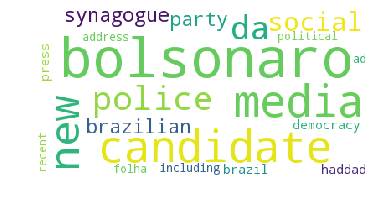

In [48]:
draw_wordcloud(lda,0)

In [32]:
pp.pprint(lda.print_topics(num_words=8))

[   (   0,
        '0.021*"trump" + 0.011*"president" + 0.011*"wall" + 0.009*"national" + '
        '0.008*"said" + 0.007*"news" + 0.007*"court" + 0.006*"government"'),
    (   1,
        '0.015*"trump" + 0.011*"wall" + 0.008*"like" + 0.006*"government" + '
        '0.006*"shutdown" + 0.006*"news" + 0.005*"president" + 0.005*"senate"'),
    (   2,
        '0.015*"trump" + 0.015*"government" + 0.014*"president" + '
        '0.013*"mcconnell" + 0.013*"democrats" + 0.012*"said" + '
        '0.012*"republicans" + 0.012*"senate"')]


In [33]:

import pyLDAvis.gensim
lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

In [34]:
doc_list = [community_data,le_monde_data,fiveguys_data,shakeshack_data]
all_text = community_data.raw() + le_monde_data.raw() + fiveguys_data.raw() + shakeshack_data.raw()

documents = [doc.raw() for doc in doc_list]
texts = [[word for word in document.lower().split()
        if word not in STOPWORDS and word.isalnum()]
        for document in documents]
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]


In [35]:
from gensim.similarities.docsim import Similarity
from gensim import corpora, models, similarities
lsi = models.LsiModel(corpus, id2word=dictionary, num_topics=2)
doc = """
Many, many years ago, I used to frequent this place for their amazing french toast. 
It's been a while since then and I've been hesitant to review a place I haven't been to in 7-8 years... 
but I passed by French Roast and, feeling nostalgic, decided to go back.

It was a great decision.

Their Bloody Mary is fantastic and includes bacon (which was perfectly cooked!!), olives, 
cucumber, and celery. The Irish coffee is also excellent, even without the cream which is what I ordered.

Great food, great drinks, a great ambiance that is casual yet familiar like a tiny little French cafe. 
I highly recommend coming here, and will be back whenever I'm in the area next.

Juan, the bartender, is great!! One of the best in any brunch spot in the city, by far.
"""
vec_bow = dictionary.doc2bow(doc.lower().split())
vec_lsi = lsi[vec_bow]
index = similarities.MatrixSimilarity(lsi[corpus])
sims = index[vec_lsi]
sims = sorted(enumerate(sims), key=lambda item: -item[1])


In [36]:
sims

[(1, 0.99406147), (0, 0.98726636), (2, 0.65141773), (3, 0.43748194)]

In [37]:
doc="""
Came to have lunch & also watch the World Cup match. I've been here many times before and not much has changed. 

You can get half off apps and bogo drinks when you sign up for their brew club. I tried their IPA 
(was not a fan).  We also ordered the backyarder and the hot mess burgers with a 
side of disco fries to share. Both were delicious and cooked perfectly. The fries were also really good - 
the gravy and the cheese mix worked perfectly. 

Service was not the best but it could have been because of how packed the bar was for the game. Still a 
solid option in the neighborhood. Should mention that the fried Oreos are out of this world!
"""
vec_bow = dictionary.doc2bow(doc.lower().split())
vec_lsi = lsi[vec_bow]
index = similarities.MatrixSimilarity(lsi[corpus])
sims = index[vec_lsi]
sims = sorted(enumerate(sims), key=lambda item: -item[1])
sims

[(2, 0.9371457), (1, 0.92266124), (3, 0.8178723), (0, 0.7871257)]